In [1]:
import os
import sys
import numpy as np

import umap.umap_ as umap

#add the parent folder to sys path so we can import from the notebook subfolder
sys.path.insert(0,'..')


BASEDIR = ""
TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo"
#TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2"
EXT='.tiff'

image_directory = os.path.join(BASEDIR, TIFDIR)
output_directory = os.path.join(image_directory, "outputs")

if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
#image_directory = ALLDIR

In [2]:
%load_ext autoreload
%autoreload 2

import xfmreadout.processops as processops
import xfmreadout.clustering as clustering
import xfmreadout.visualisations as vis

FORCE_EMBED=True
FORCE_CLUST=True
OVERWRITE=True

elements, data, dims, sd_data, sd_dims = processops.compile(image_directory)

data, dims = processops.data_crop(data, dims, 100, 500, 150, 350)

#data, elements, dims, sd_data, sd_dims = processops.compile(image_directory)

-----------------
BEGIN reading processed data
Location: /home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo
-----
Map files found: 20
Elements identified: ['Al', 'As', 'Ca', 'Cl', 'Compton', 'Cr', 'Cu', 'Fe', 'K', 'Mn', 'Mo', 'MoL', 'Ni', 'P', 'S', 'Si', 'Ti', 'V', 'Zn', 'sum']
-----------------
READING MAP DATA
Initial shape: (393, 700, 20)
Revised shape: (392, 700, 20)
-----
-----------------
READING VARIANCE DATA
Initial shape: (197, 350, 20)
-----
Al -- data: 0.054427698254585266, var: 1.4911073446273804, ratio: 54.79222500472953
As -- data: 0.0013860455946996808, var: 0.011784680187702179, ratio: 17.00475111752093
Ca -- data: 0.0773456022143364, var: 0.055722881108522415, ratio: 1.4408803994855677
Cl -- data: 0.003481516381725669, var: 0.12431034445762634, ratio: 71.41160967107669
Compton -- data: 5.356117216415157e-10, var: 1.7024261111941996e-08, ratio: 63.56941203514703
Cr -- data: 0.00429584551602602, var: 0.03232191130518913, ratio: 15.047985866628338
Cu -- data: 0

(80000,)
ELEMENT MAP: Si
Si, max: 3.98, 98: 3.52, avg: 0.70


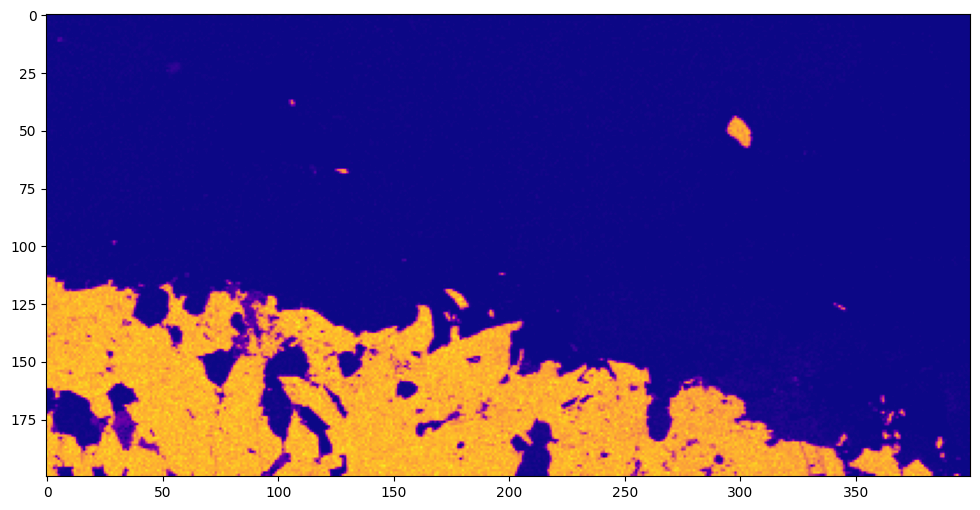

(68950,)
ELEMENT MAP: Si
Si, max: 3.58, 98: 3.47, avg: 0.98


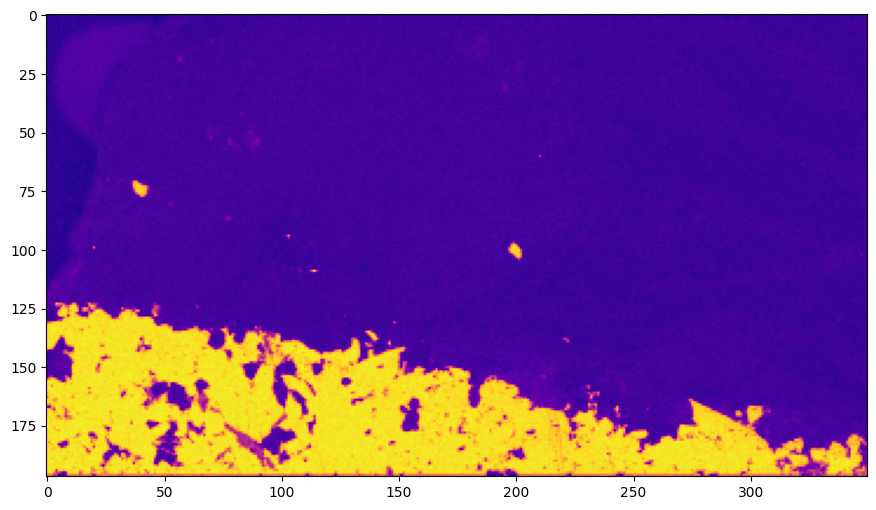

In [3]:
ELEMENT = "Si"

vis.show_map(data, dims, elements, ELEMENT)

vis.show_map(sd_data, sd_dims, elements, ELEMENT)

LOADING EMBED
CALCULATING CATS
RUNNING CLASSIFIER
cluster 0, count: 22546
cluster 1, count: 5205
cluster 2, count: 4520
cluster 3, count: 7652
cluster 4, count: 4519
cluster 5, count: 3776
cluster 6, count: 4486
cluster 7, count: 4411
cluster 8, count: 7923
cluster 9, count: 5270
cluster 10, count: 9692
---------------------------
CLASSIFICATION COMPLETE
---------------------------
total time: 3.58 s
time per pixel: 4.5e-05 s
---------------------------
(80000, 3)
running reducer: PCA across data with shape: (80000, 3)
[[ 0.9262861   7.0106645   8.34457   ]
 [-3.9179065   7.2182946   5.16506   ]
 [-1.9886161  -0.04029439  7.5258226 ]
 [ 9.203901    6.2032      4.8623505 ]
 [12.862862    6.233551    8.25534   ]
 [12.75164     6.2937455   9.864429  ]
 [ 1.8771935  10.831323    9.916341  ]
 [ 0.797081   10.105107   11.16959   ]
 [ 0.28176183 12.024657    8.344509  ]
 [-2.0911674  12.182705    9.491815  ]
 [-0.01735156  1.0192956   8.174774  ]]
[[0.5        0.5        0.5       ]
 [0.     

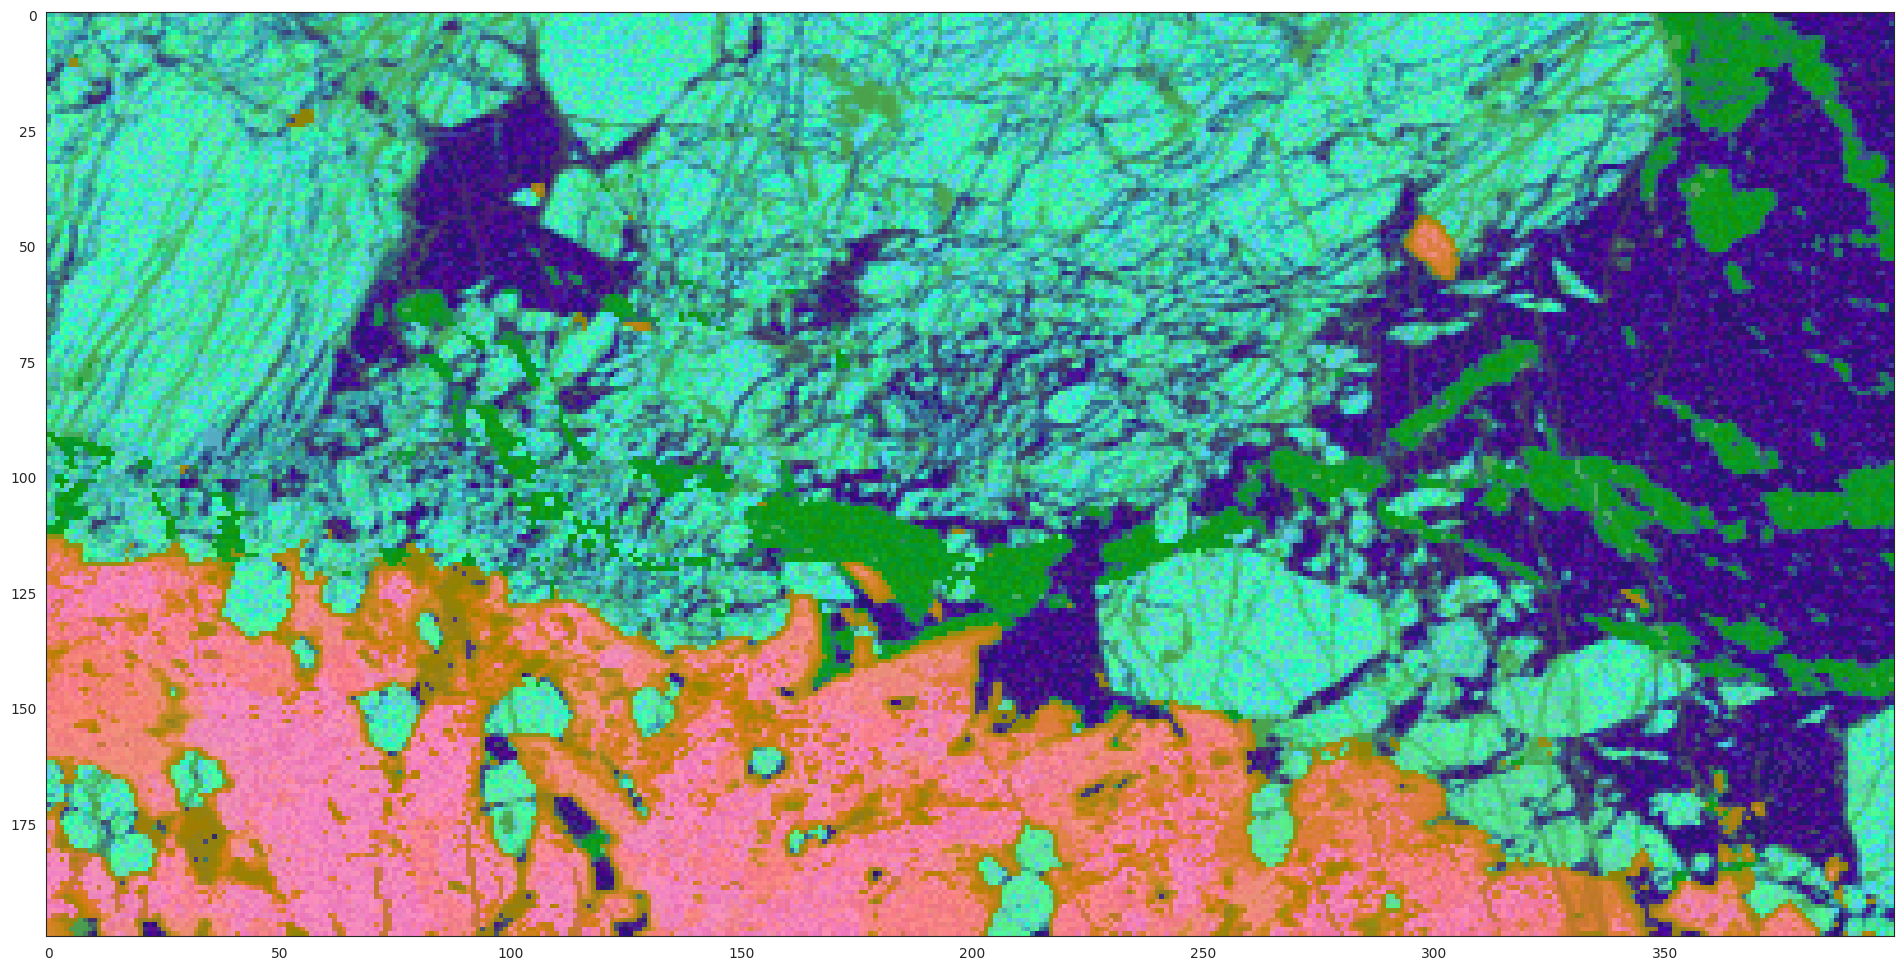

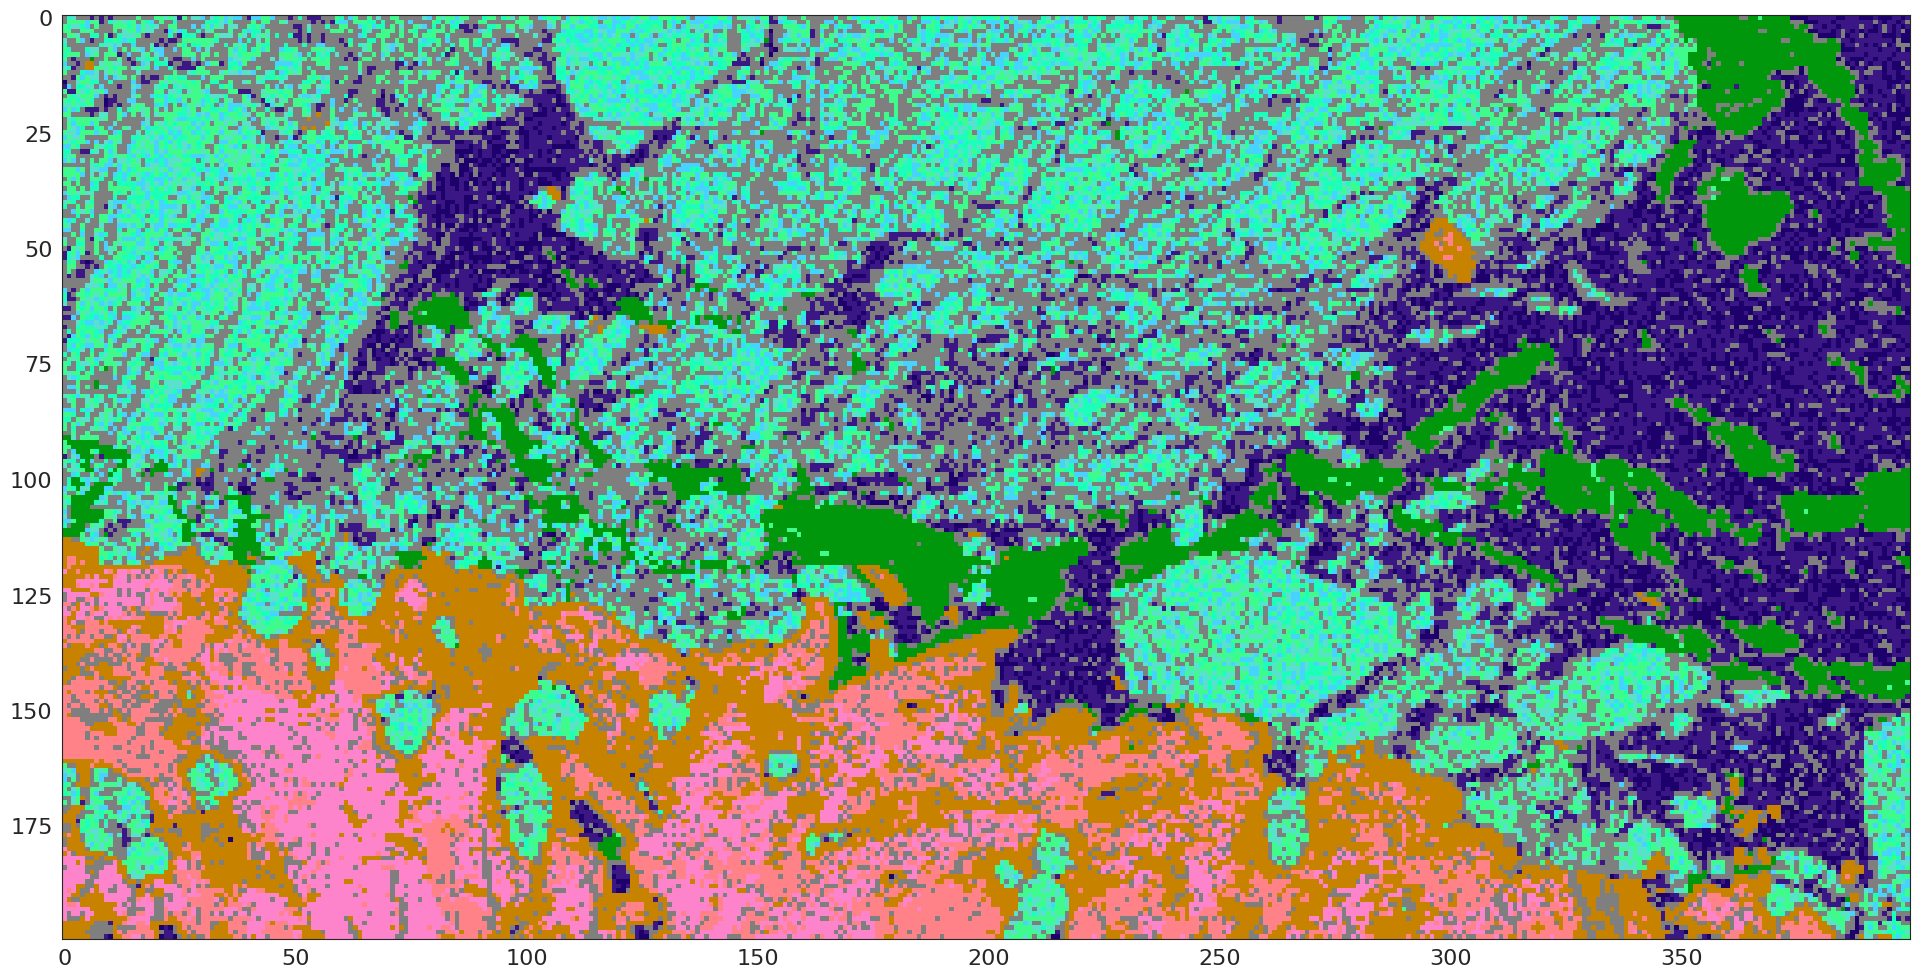

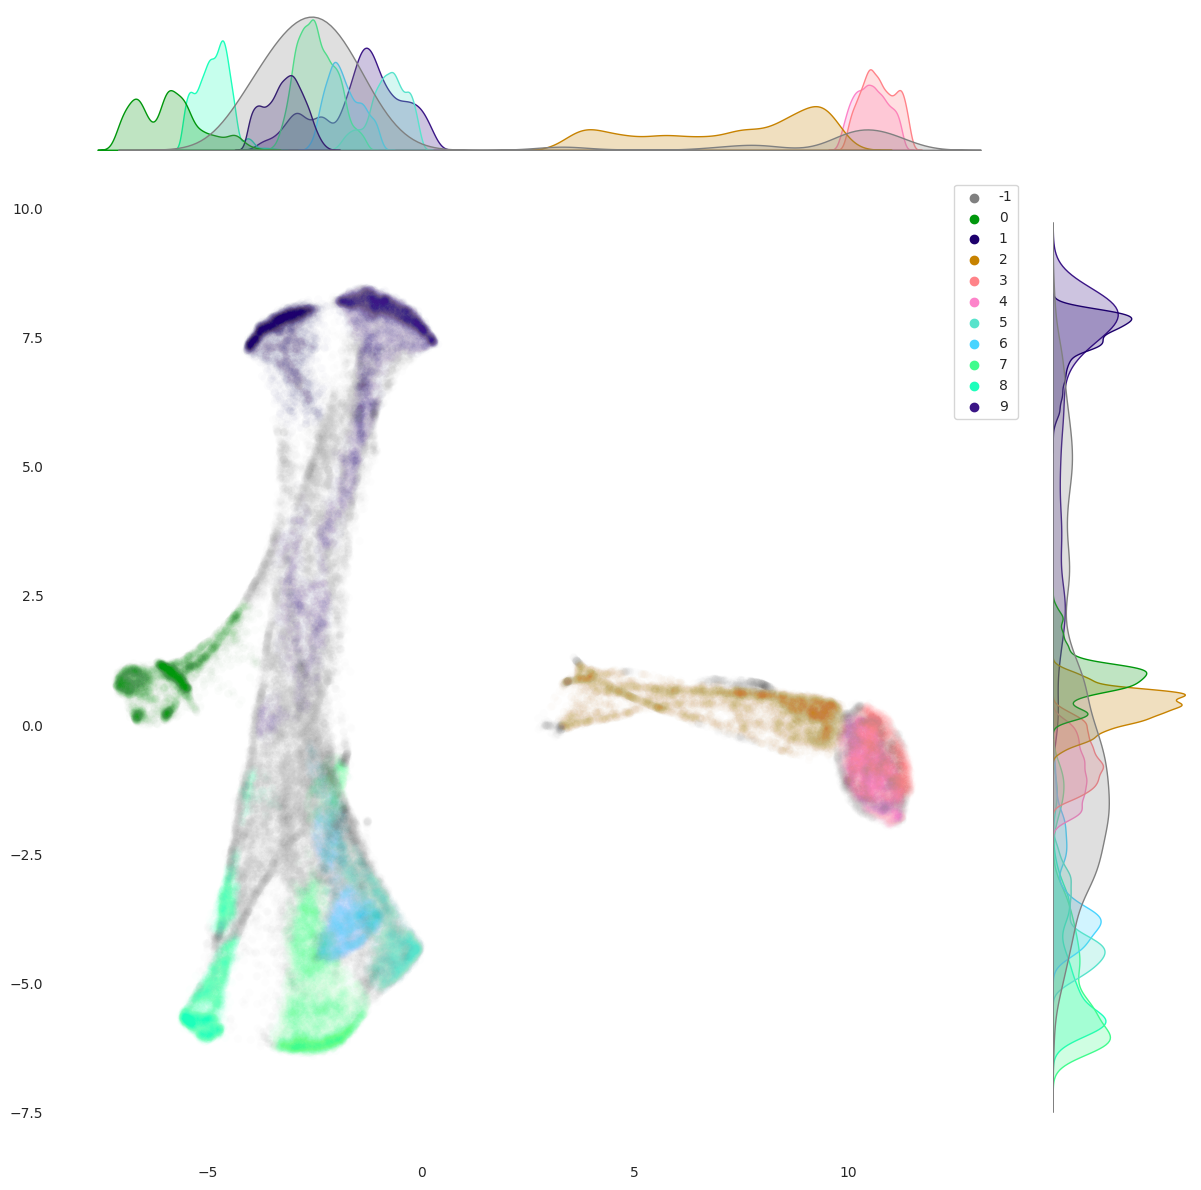

Al, max: 0.07, 98: 0.01, avg: 0.00
As, max: 0.00, 98: 0.00, avg: 0.00
Ca, max: 2.56, 98: 0.26, avg: 0.03
Cl, max: 0.00, 98: 0.00, avg: 0.00
Compton, max: 0.86, 98: 0.07, avg: 0.01
Cr, max: 0.00, 98: 0.00, avg: 0.00
Cu, max: 1.04, 98: 0.97, avg: 0.22
Fe, max: 3.34, 98: 3.13, avg: 2.00
K, max: 0.02, 98: 0.00, avg: 0.00
Mn, max: 0.26, 98: 0.02, avg: 0.01
Mo, max: 0.22, 98: 0.12, avg: 0.04
MoL, max: 0.03, 98: 0.00, avg: 0.00
Ni, max: 0.00, 98: 0.00, avg: 0.00
P, max: 0.00, 98: 0.00, avg: 0.00
S, max: 1.08, 98: 0.89, avg: 0.46
Si, max: 3.98, 98: 3.52, avg: 0.70
Ti, max: 0.02, 98: 0.00, avg: 0.00
V, max: 0.00, 98: 0.00, avg: 0.00
Zn, max: 0.43, 98: 0.03, avg: 0.00
sum, max: 0.87, 98: 0.75, avg: 0.44
CPU times: user 5.98 s, sys: 4.41 s, total: 10.4 s
Wall time: 7.73 s


In [23]:
%%time

FORCE_EMBED=False
FORCE_CLUST=True
OVERWRITE=True

categories, classavg, embedding = clustering.run(data, image_directory, sqrt=True, force_embed=FORCE_EMBED, force_clust=FORCE_CLUST, overwrite=OVERWRITE)

palette = vis.plot_clusters(categories, classavg, embedding, dims, output_directory=output_directory)

for i in range(len(elements)):
    print(f"{elements[i]}, max: {np.max(data[:,i]):.2f}, 98: {np.quantile(data[:,i],0.98):.2f}, avg: {np.average(data[:,i]):.2f}")





In [24]:
import pandas as pd
from tabulate import tabulate

elements

df = pd.DataFrame(data=classavg, columns=elements)

df
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-----------+-------------+-------------+-------------+-------------+-----------+
|    |          Al |          As |          Ca |          Cl |     Compton |          Cr |          Cu |          Fe |           K |          Mn |         Mo |         MoL |          Ni |           P |         S |          Si |          Ti |           V |          Zn |       sum |
|----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-----------+-------------+-------------+-------------+-------------+-----------|
|  0 | 0.000783072 | 7.95852e-09 | 0.00762668  | 7.95646e-05 | 0.0167615   | 0.000633282 | 0.0285418   | 3.05543     | 4.92715e-05 | 0.0080056   | 0.01953

In [8]:
import pandas as pd
from tabulate import tabulate
import xfmreadout.utils as utils

raw_data = data

def calc_classavg(dataset, categories, n_clusters, n_channels):
    """
    calculate summed spectrum for each cluster
    args: 
        dataset, spectrum by px
        catlist, categories by px
    returns:
        specsum, spectrum by category
    
    aware: nclust, number of clusters
    """
    specsum=np.zeros((n_clusters,n_channels))

    if n_clusters != utils.count_categories(categories)[0]:
        raise ValueError("cluster count mismatch")

    for i in range(np.min(categories), np.max(categories)):
        datcat=dataset[categories==i]
        print(f"cluster {i}, count: {datcat.shape[0]}") #DEBUG
        pxincat = datcat.shape[0]   #no. pixels in category i
        specsum[i,:]=(np.sum(datcat,axis=0))/pxincat
    return specsum

n_channels = data.shape[1]
n_clusters, category_list = utils.count_categories(categories)

classavg2=calc_classavg(raw_data, categories, n_clusters, n_channels) 
df = pd.DataFrame(data=classavg, columns=elements)
print(tabulate(df, headers='keys', tablefmt='psql'))




print(n_clusters)
print(category_list)
for i in category_list:
    print(i)
print(len(category_list))



cluster -1, count: 22546
cluster 0, count: 5205
cluster 1, count: 4520
cluster 2, count: 7652
cluster 3, count: 4519
cluster 4, count: 3776
cluster 5, count: 4486
cluster 6, count: 4411
cluster 7, count: 7923
cluster 8, count: 5270
+----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-----------+-------------+-------------+-------------+-------------+-----------+
|    |          Al |          As |          Ca |          Cl |     Compton |          Cr |          Cu |          Fe |           K |          Mn |         Mo |         MoL |          Ni |           P |         S |          Si |          Ti |           V |          Zn |       sum |
|----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+---

In [16]:
n_clusters = len(category_list)

for i in range(n_clusters):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


(80000,)
(80000,)
(80000,)
(80000,)


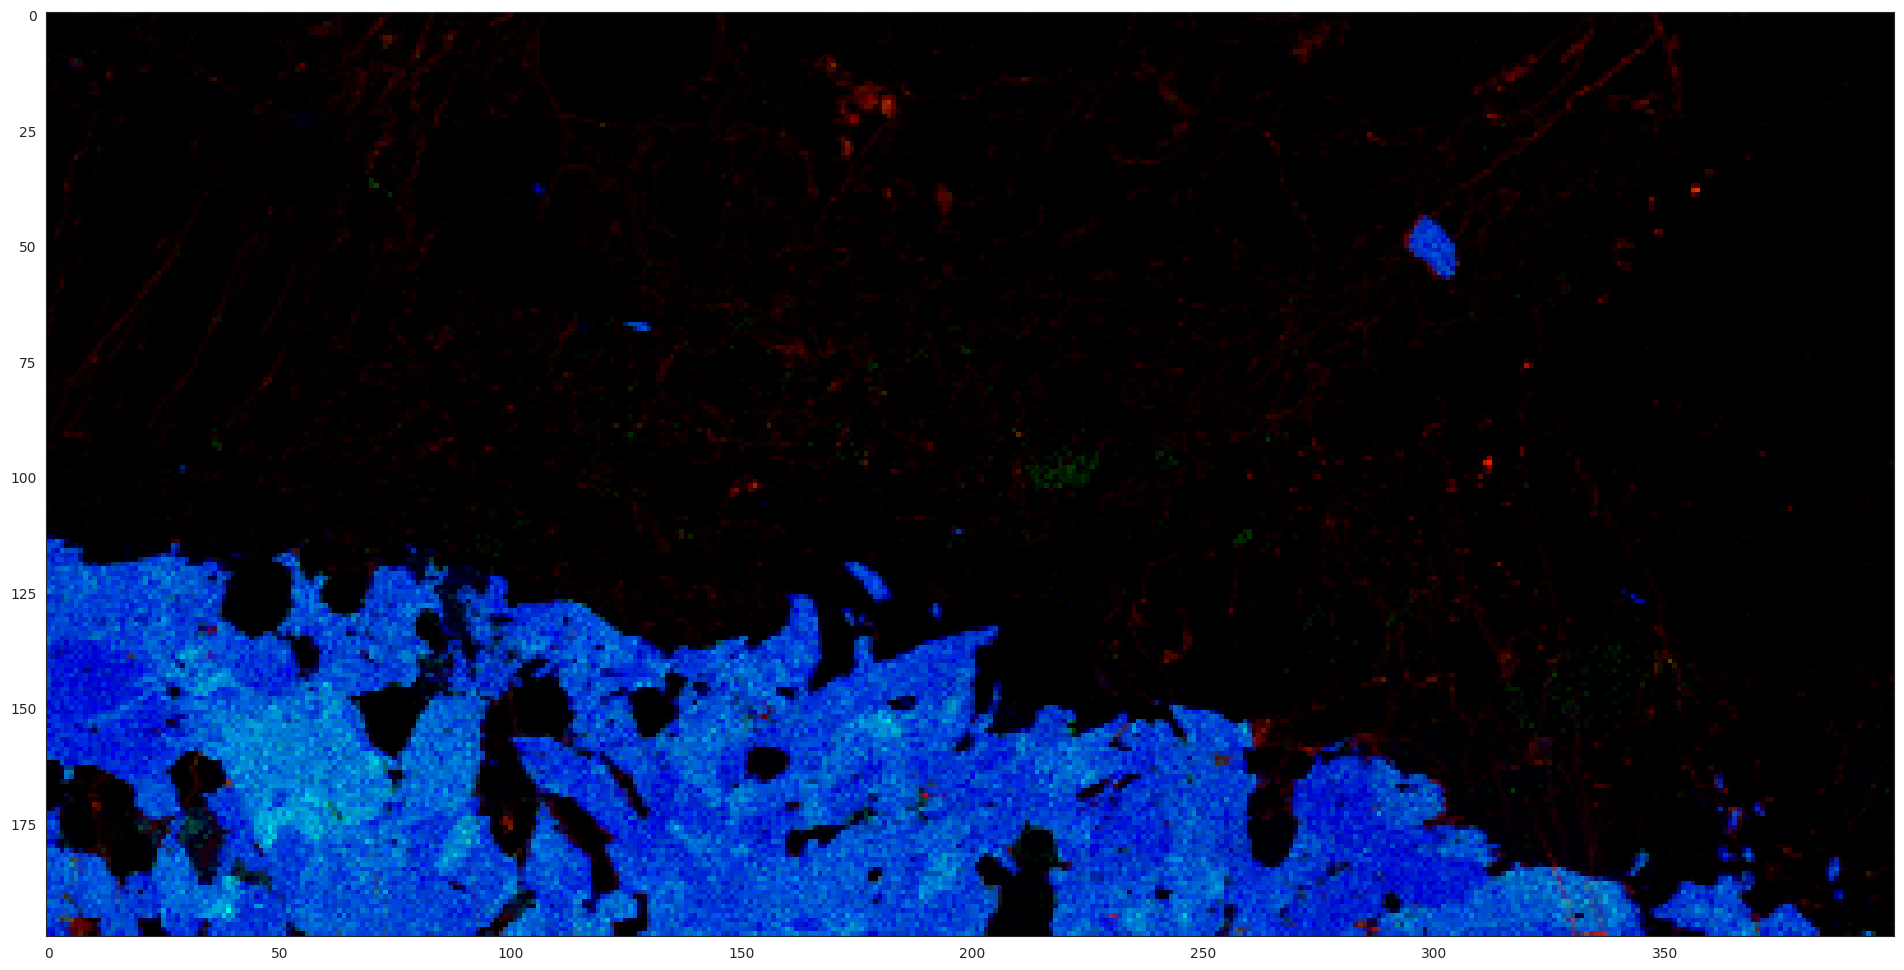

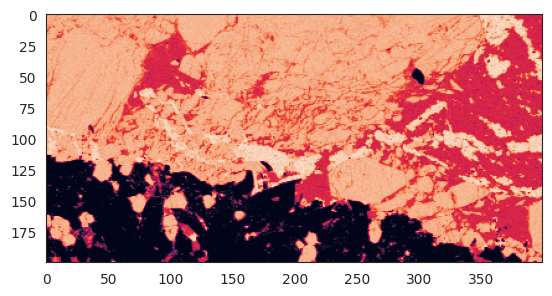

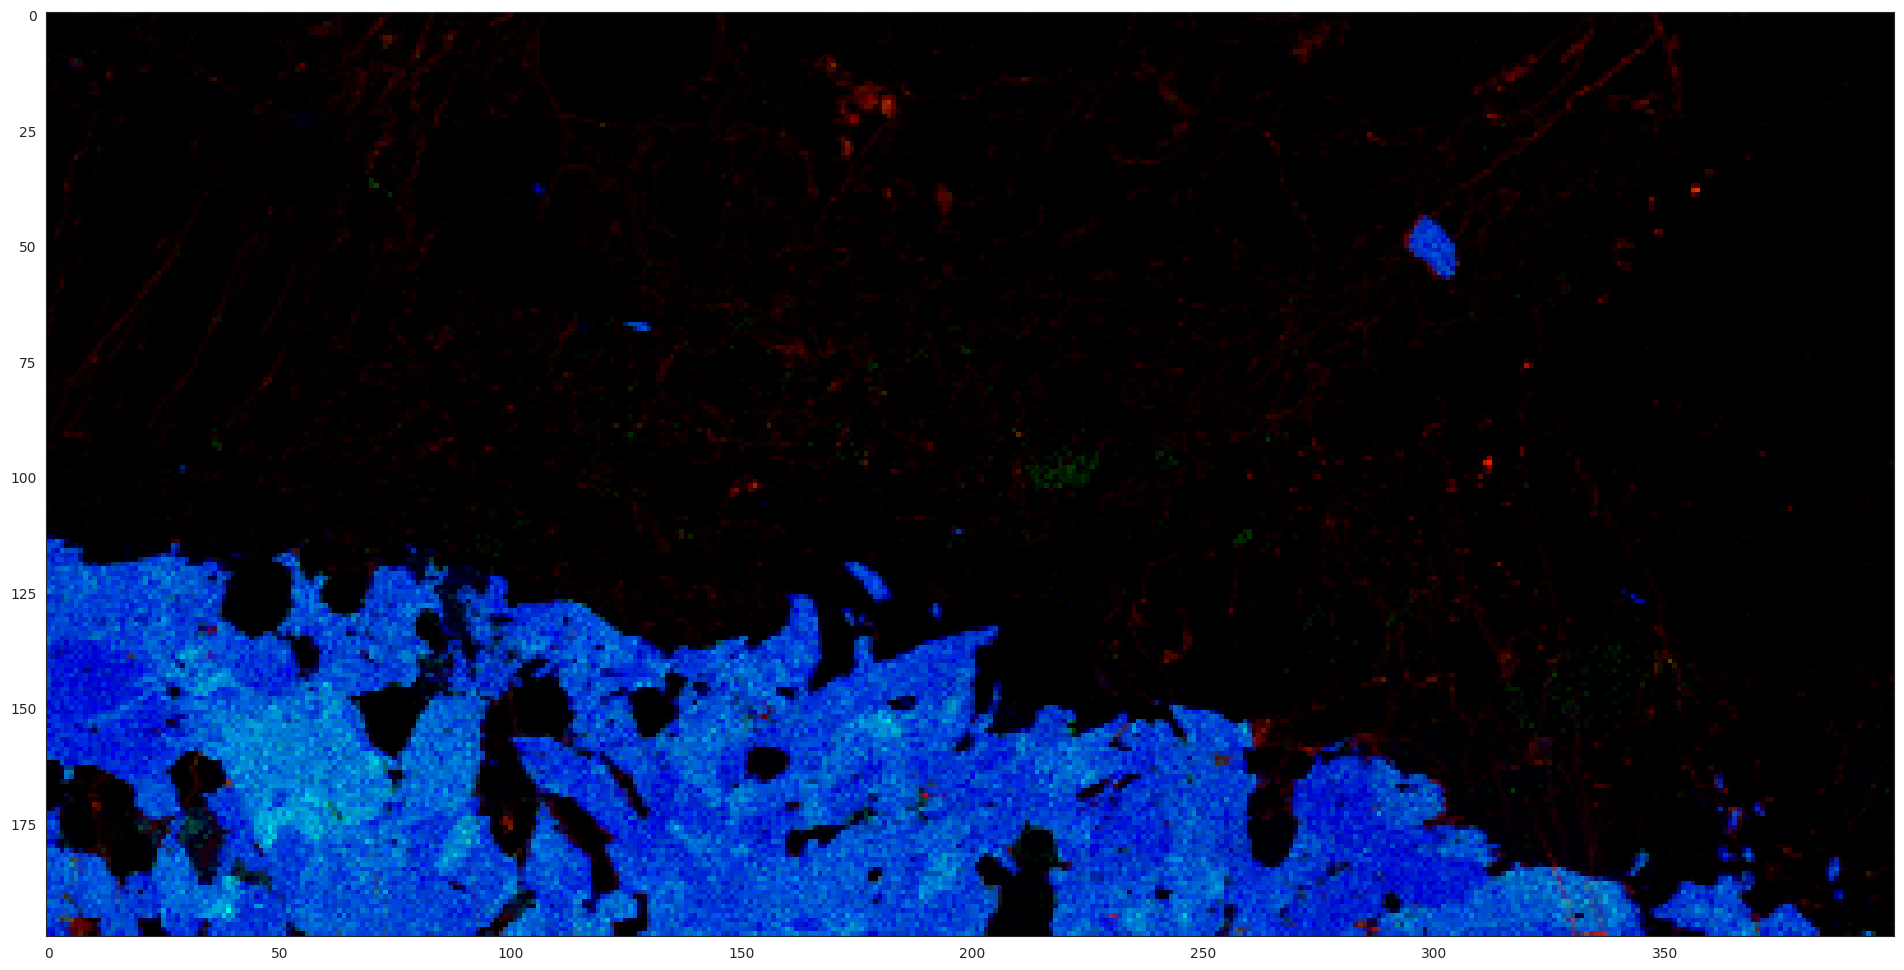

In [36]:
import xfmreadout.utils as utils
import xfmreadout.visualisations as vis

r = utils.get_map(data, dims, elements, 'Fe')
plt.imshow(r)

#vis.tricolour_enames('Fe','Cu','Si', data, dims, elements)
vis.tricolour_enames('Ca','As','Si', data, dims, elements)

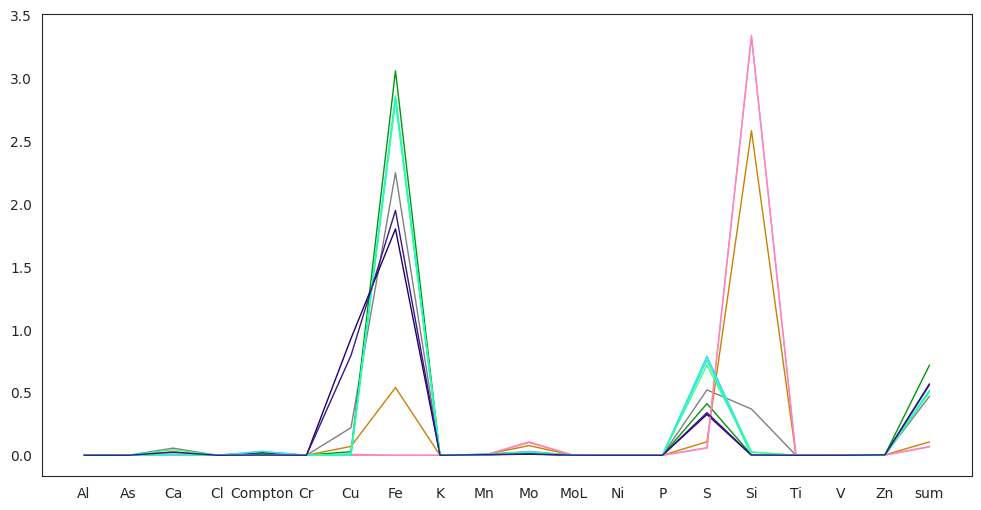

In [40]:
from matplotlib import colors

vis.category_avgs(categories, elements, classavg, palette=palette)